In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import model_analyzer as ma
import ml_pipe as ml
import numpy as np
import acs_implementation_facs as aif
import pandas as pd
import combined_features_rachel as cfr



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
fac ='/Users/csolisu/Downloads/rcra_downloads/RCRA_FACILITIES.csv'
evalu = '/Users/csolisu/Downloads/rcra_downloads/RCRA_EVALUATIONS.csv'
viols = '/Users/csolisu/Downloads/rcra_downloads/RCRA_VIOLATIONS.csv'
hist = '/Users/csolisu/Downloads/rcra_downloads/RCRA_VIOSNC_HISTORY.csv'

fac1 = pd.read_csv(fac)
evalu1 = pd.read_csv(evalu)
viols1 = pd.read_csv(viols)
hist1 = pd.read_csv(hist

full_features_df = cfr.create_all_features(fac1, evalu1, viols1, hist1)

FINAL INFO FROM snc_info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041494 entries, 0 to 1041493
Data columns (total 25 columns):
ID_NUMBER                    1041494 non-null object
FACILITY_NAME                1041488 non-null object
ACTIVITY_LOCATION            1041494 non-null object
FULL_ENFORCEMENT             1041494 non-null object
HREPORT_UNIVERSE_RECORD      1041397 non-null object
STREET_ADDRESS               1041358 non-null object
CITY_NAME                    1041392 non-null object
STATE_CODE                   1041493 non-null object
ZIP_CODE                     1041293 non-null object
LATITUDE83                   452617 non-null float64
LONGITUDE83                  452617 non-null float64
FED_WASTE_GENERATOR          1032904 non-null object
TRANSPORTER                  1041200 non-null object
ACTIVE_SITE                  1041494 non-null object
OPERATING_TSDF               1041494 non-null object
EvalCount                    1041494 non-null float64
Sum_Violation

In [4]:
fac ='/Users/csolisu/Downloads/rcra_downloads/RCRA_FACILITIES.csv'
evalu = '/Users/csolisu/Downloads/rcra_downloads/RCRA_EVALUATIONS.csv'
shp_file = '/Users/csolisu/Downloads/tl_2017_us_zcta510/tl_2017_us_zcta510.shp'
zip_to_zta_csv = '/Users/csolisu/Downloads/zip_to_zcta_2017.xlsx'

fac_data = aif.go(fac,evalu, zip_to_zta_csv,shp_file)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')
/Users/csolisu/epa-rcra-violations/full_pipeline_files/acs_implementation_facs.py:158: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  entire_fac = pd.concat([geo_fac_nonmiss_acs, geo_fac_miss_acs])


In [6]:
feature_lst = ['ID_NUMBER','population', 'B02001_002E', 'B02001_003E', 'B02001_004E', 'B02001_005E', 
'B02001_006E', 'B02001_007E', 'B02001_008E', 'B02001_009E', 'B02001_010E', 
'B11016_002E', 'B11016_003E', 'B11016_004E', 'B11016_005E', 'B11016_006E', 
'B11016_007E', 'B11016_008E', 'B17026_002E', 'B17026_003E', 'B17026_004E', 
'B17026_005E', 'B17026_006E', 'B17026_007E', 'B17026_008E', 'B17026_009E', 
'B17026_010E', 'B17026_011E', 'B17026_012E', 'B17026_013E', 'B19001_002E', 
'B19001_003E', 'B19001_004E', 'B19001_005E', 'B19001_006E', 'B19001_007E', 
'B19001_008E', 'B19001_009E', 'B19001_010E', 'B19001_011E', 'B19001_012E', 
'B19001_013E', 'B19001_014E', 'B19001_015E', 'B19001_016E', 'B19001_017E', 
'median income', 'C17002_002E', 'C17002_003E', 'C17002_004E', 'C17002_005E',
'C17002_006E', 'C17002_007E', 'C17002_008E','white alone', 'black alone', 
'native alone', 'asian alone', 'pacific alone', 'other alone', 'two or more', 
'two or more some other', 'less10k', '10kto15k', '15kto20k', '20kto25k', '25kto30k',
'30kto35k', '35kto40k', '40kto45k', '1 person', '2 person', '3 person', '4 person', 
'5 person', '6 person', '7plusperson', 'under_p5_x', 'p5top74', 'p75top99', '1to1p24_x',
'1p25to1p49_x', '1p50to1p74', '1p75to1p84', '1p85to1p99_x', 'under_p5_y', 'p5top99', 
'1to1p24_y', '1p25to1p49_y', '1p50to1p84', '1p85to1p99_y', '2andver']
feature_reduced = ['ID_NUMBER','population','black alone', 'median income','under_p5_x']

In [7]:
acs_data = fac_data[feature_reduced]
acs_data.drop_duplicates(subset='ID_NUMBER',inplace= True)

In [9]:
features = pd.merge(full_features_df,acs_data, how= 'left', 
                       on= 'ID_NUMBER')

In [11]:
#features.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

260373.5

In [18]:
clfs, grid = ml.define_clfs_params('small')

In [19]:
thresholds = [0.99, .95, .9]

In [20]:
feats = ml.select_features(features)

In [21]:
feats = [x for x in feats if x!= 'HasViolation']

In [22]:
train_xs = [x[feats] for x in train_xs]
test_xs = [x[feats] for x in train_xs]

In [23]:
train_xs = [x.fillna(0) for x in train_xs]
test_xs = [x.fillna(0) for x in test_xs]
train_ys = [pd.Series(x).fillna(0).tolist() for x in train_ys]
test_ys = [pd.Series(x).fillna(0).tolist() for x in test_ys]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/csolisu/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]


RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

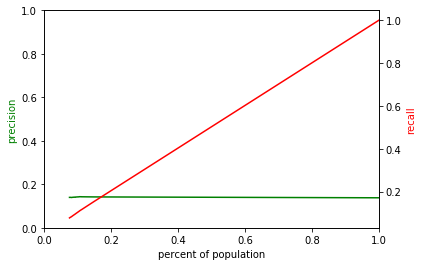

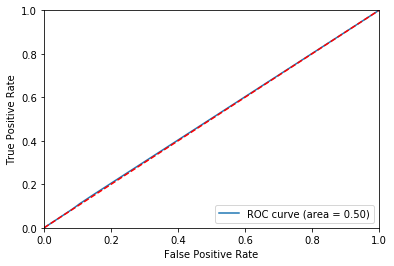

RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

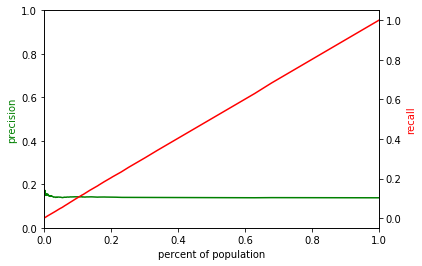

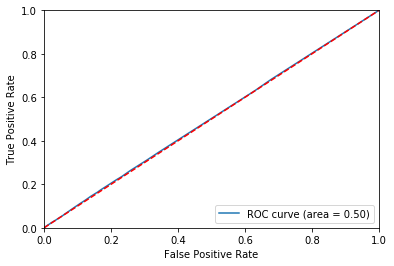

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/csolisu/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]


RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

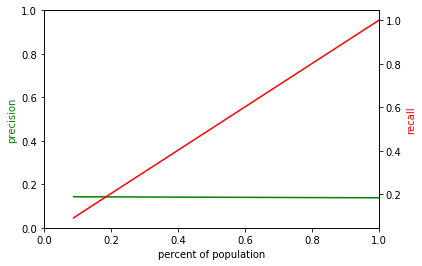

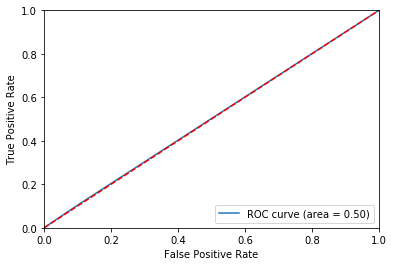

RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

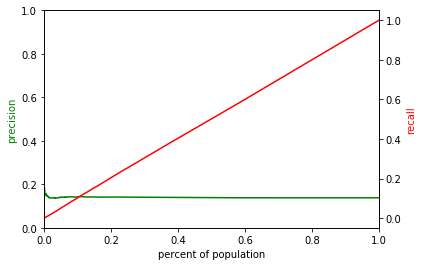

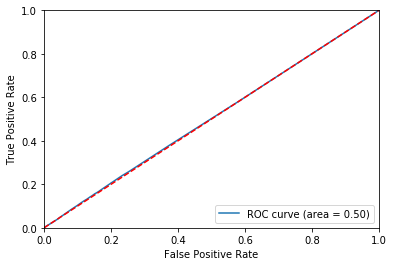

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/csolisu/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]


RF{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

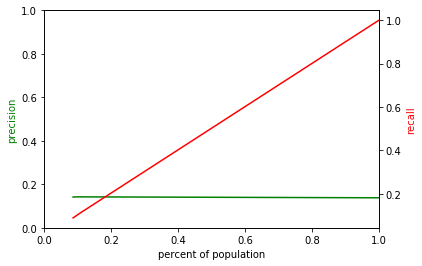

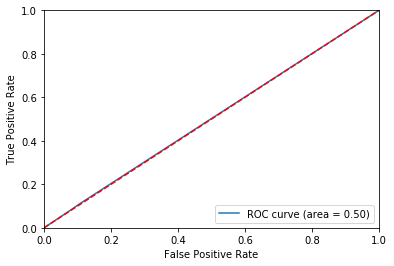

RF{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

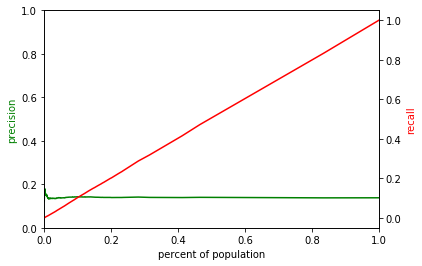

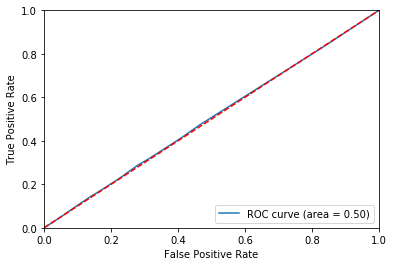

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/csolisu/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RF{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

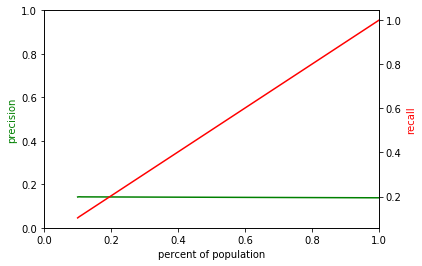

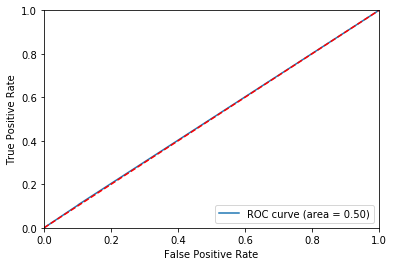

RF{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

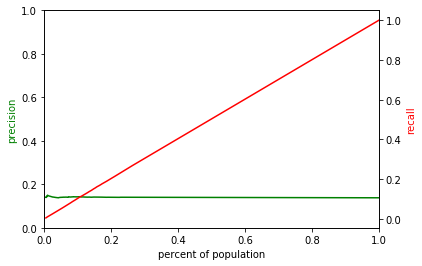

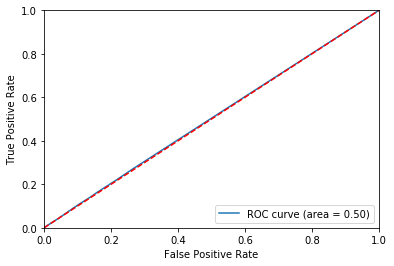

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/csolisu/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RF{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

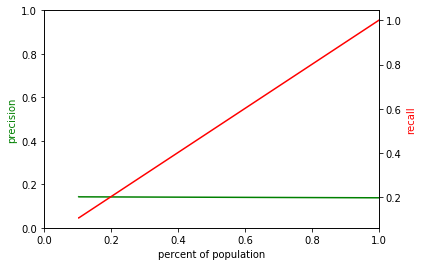

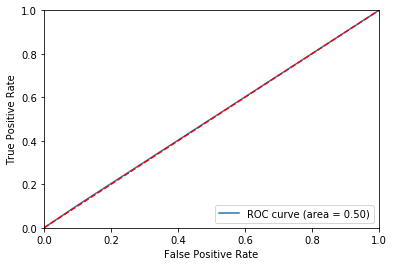

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/csolisu/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RF{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

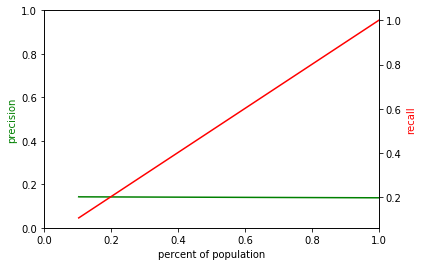

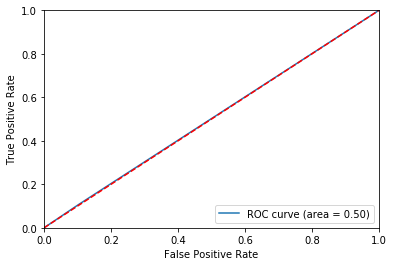

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/csolisu/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RF{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

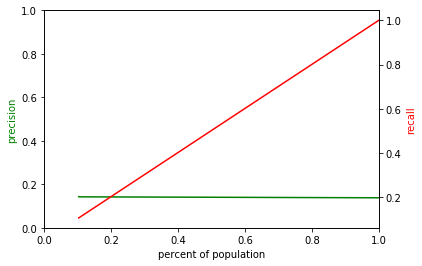

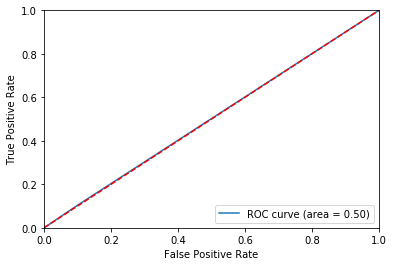

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/csolisu/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RF{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

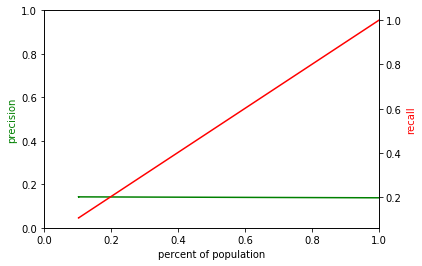

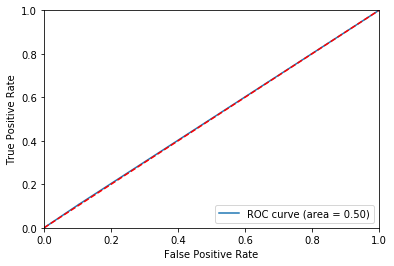

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/csolisu/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RF{'max_depth': 50, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

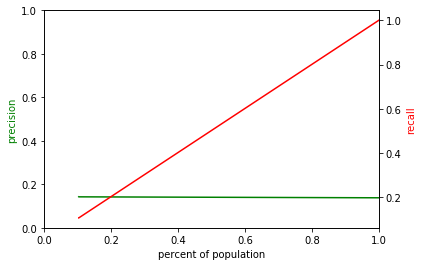

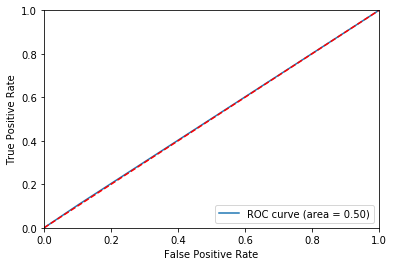

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/csolisu/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RF{'max_depth': 50, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

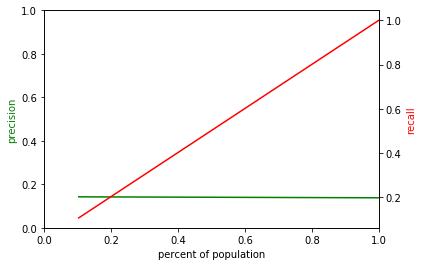

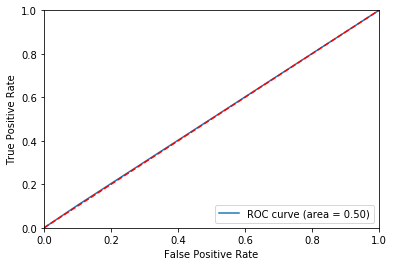

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/csolisu/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RF{'max_depth': 50, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

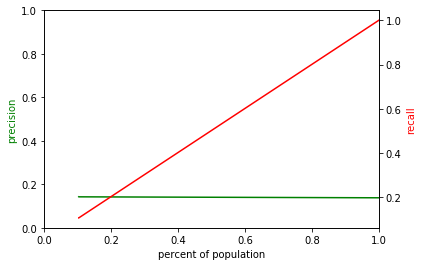

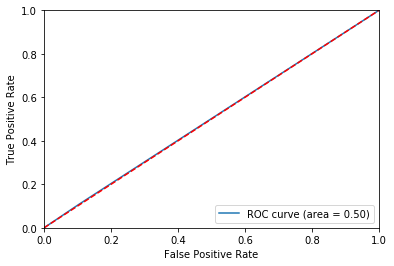

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/csolisu/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RF{'max_depth': 50, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

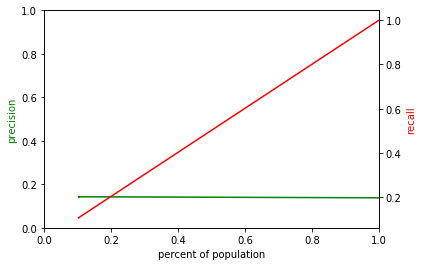

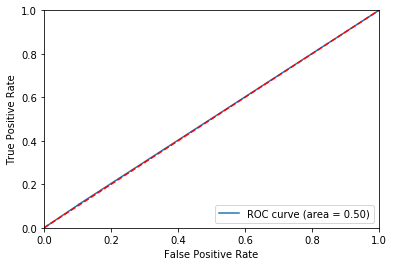

ET{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

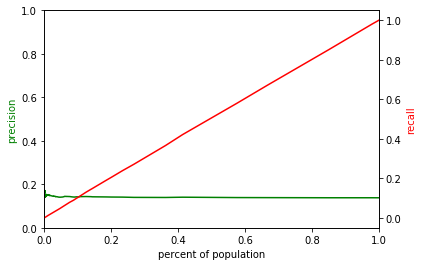

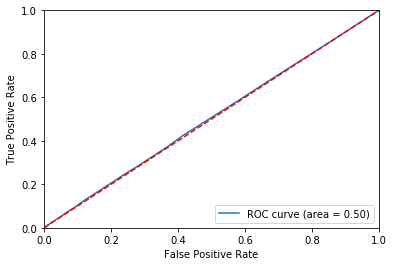

ET{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

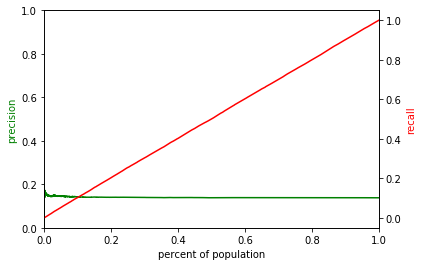

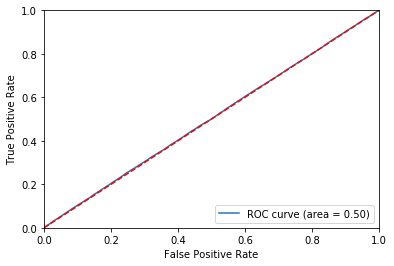

ET{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

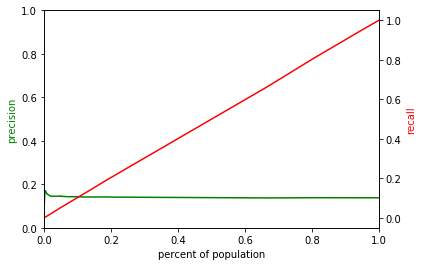

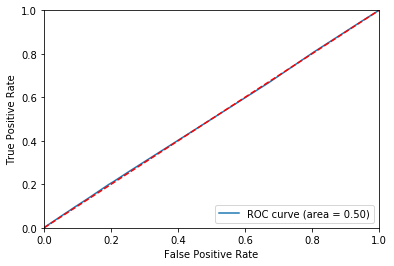

ET{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

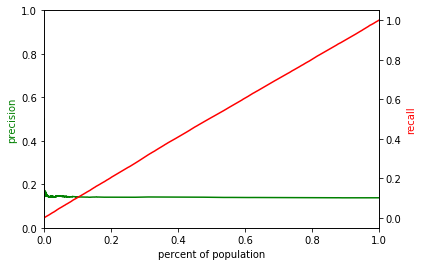

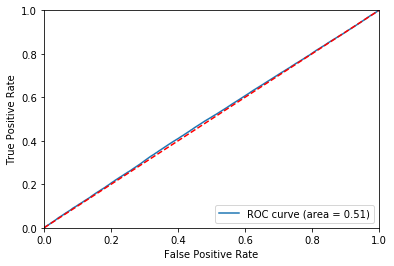

ET{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

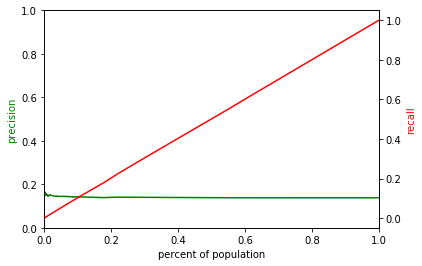

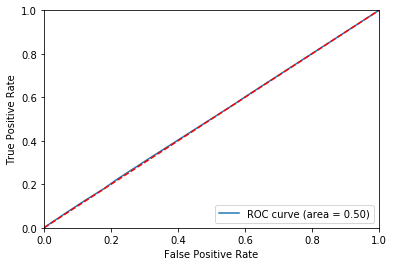

ET{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

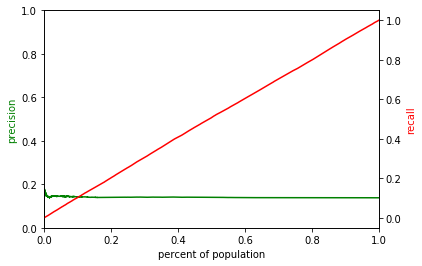

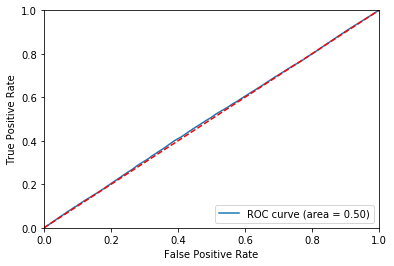

ET{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

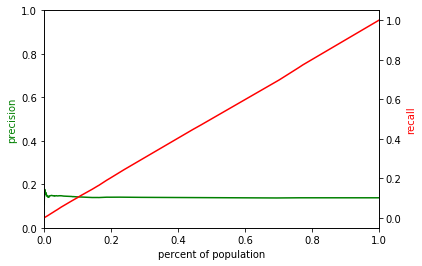

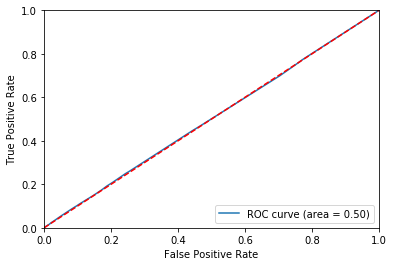

ET{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

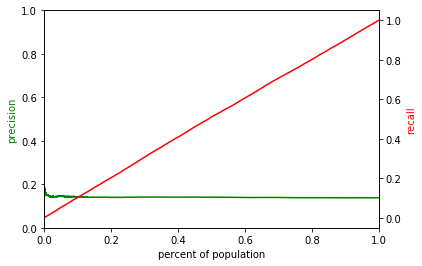

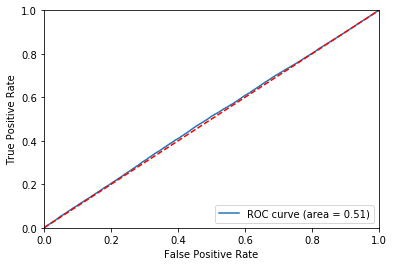

ET{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

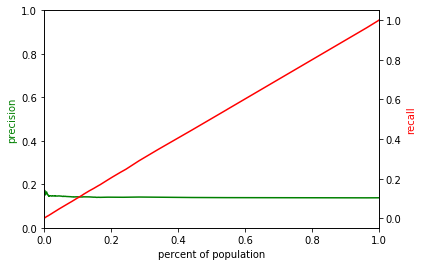

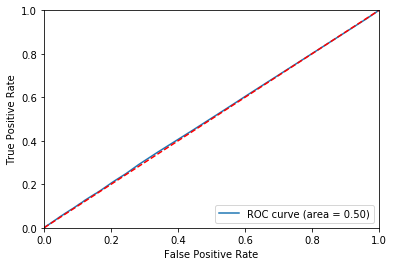

ET{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

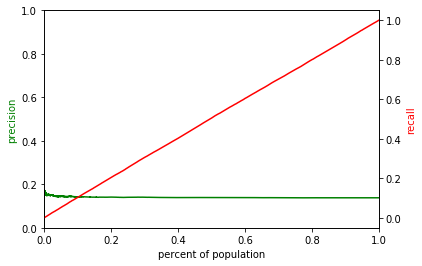

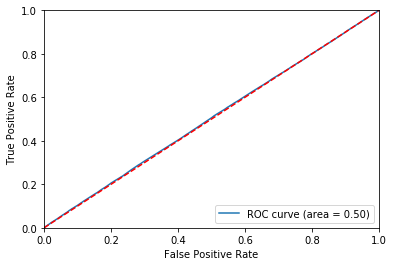

ET{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

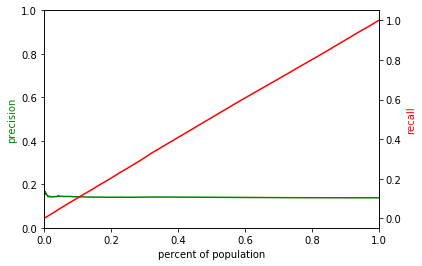

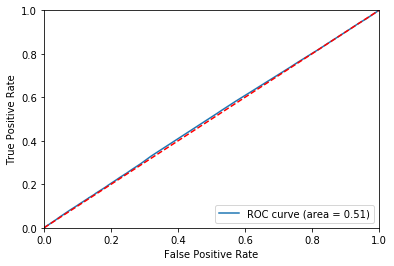

ET{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

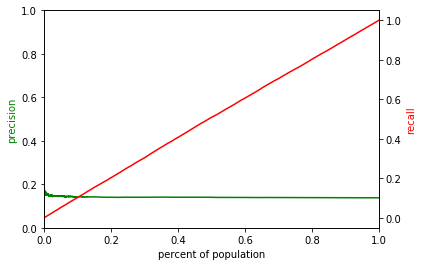

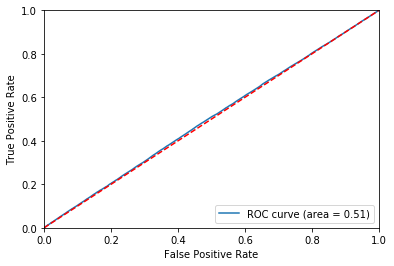

ET{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

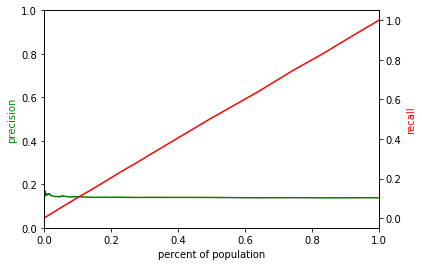

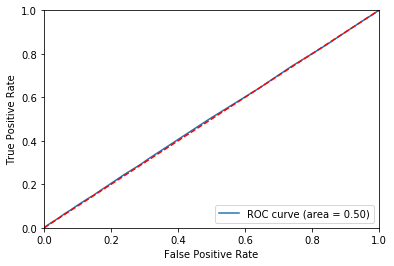

ET{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

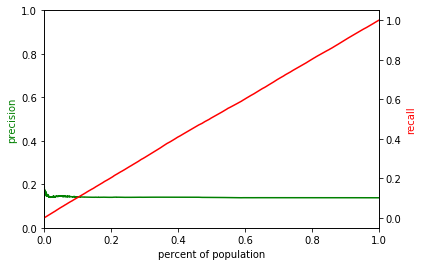

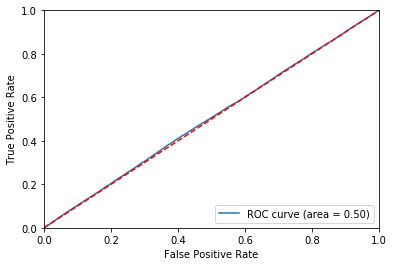

ET{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

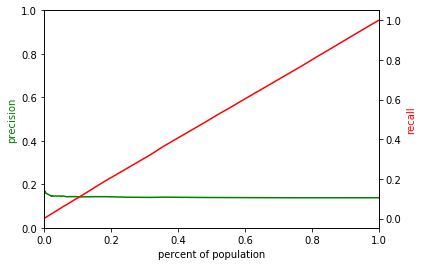

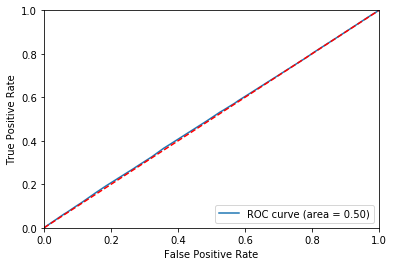

ET{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

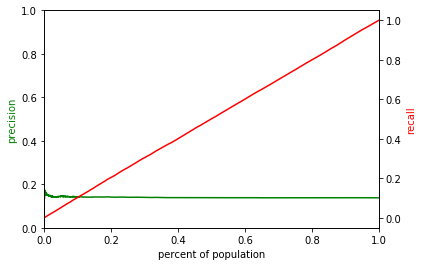

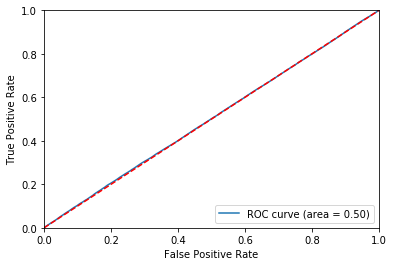

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/csolisu/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


AB{'algorithm': 'SAMME', 'n_estimators': 10}


<Figure size 432x288 with 0 Axes>

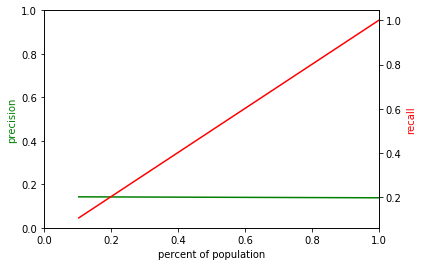

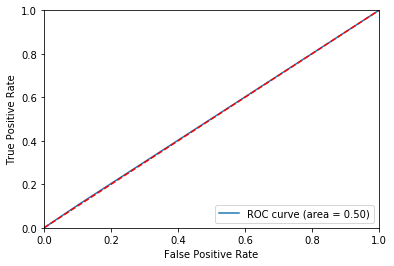

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/csolisu/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


AB{'algorithm': 'SAMME', 'n_estimators': 100}


<Figure size 432x288 with 0 Axes>

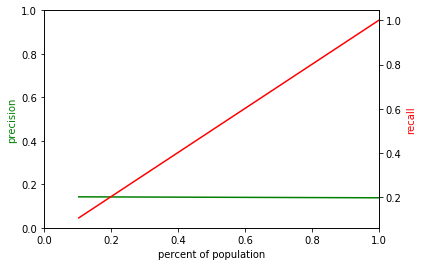

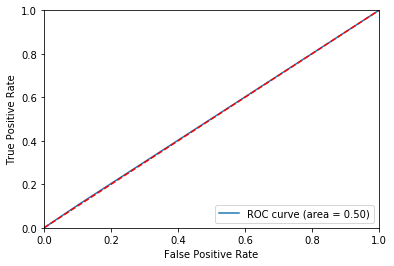

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/csolisu/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


AB{'algorithm': 'SAMME', 'n_estimators': 500}


<Figure size 432x288 with 0 Axes>

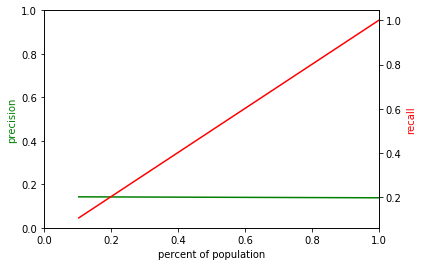

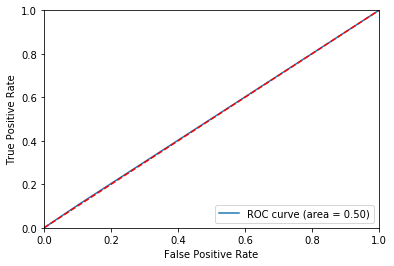

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/csolisu/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


AB{'algorithm': 'SAMME.R', 'n_estimators': 10}


<Figure size 432x288 with 0 Axes>

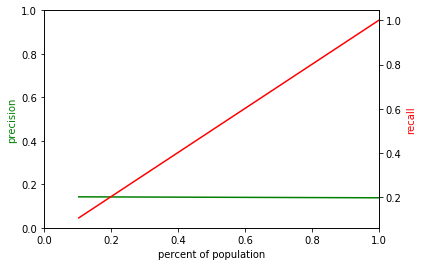

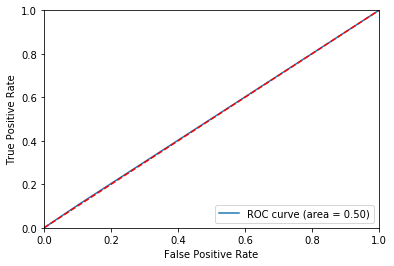

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/csolisu/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


AB{'algorithm': 'SAMME.R', 'n_estimators': 100}


<Figure size 432x288 with 0 Axes>

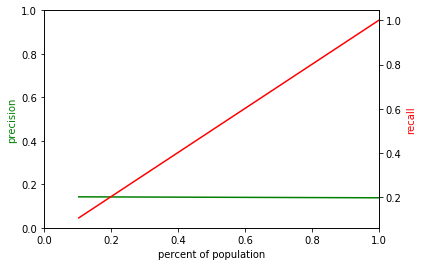

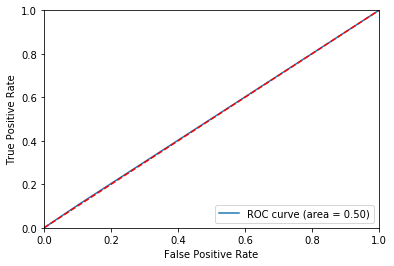

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/csolisu/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


AB{'algorithm': 'SAMME.R', 'n_estimators': 500}


<Figure size 432x288 with 0 Axes>

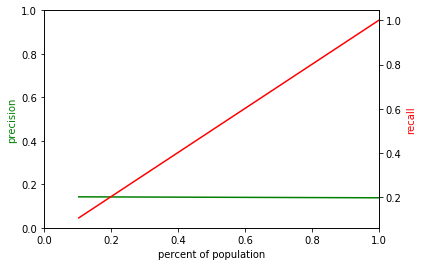

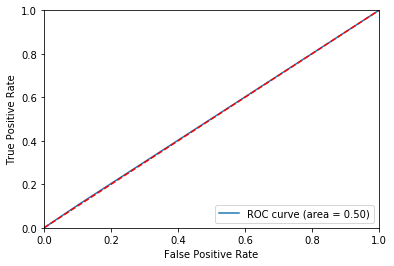

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LR{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


<Figure size 432x288 with 0 Axes>

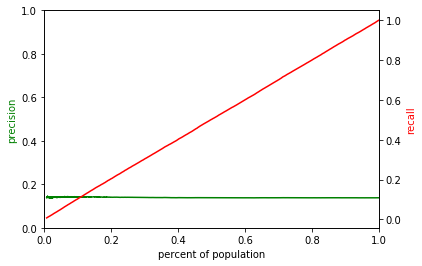

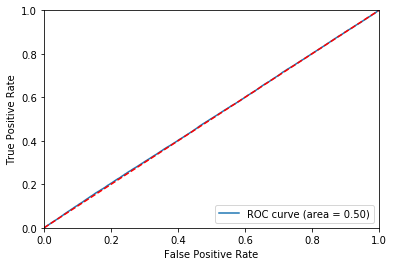

LR{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


<Figure size 432x288 with 0 Axes>

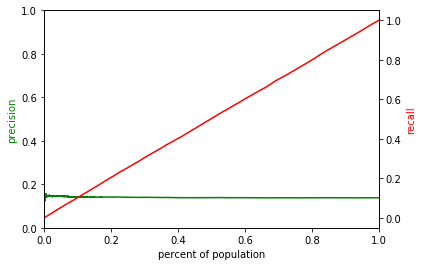

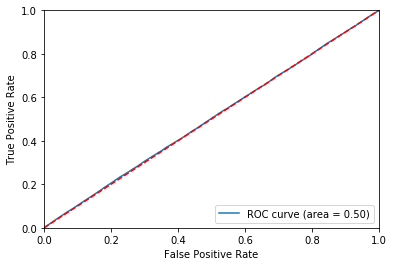

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LR{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


<Figure size 432x288 with 0 Axes>

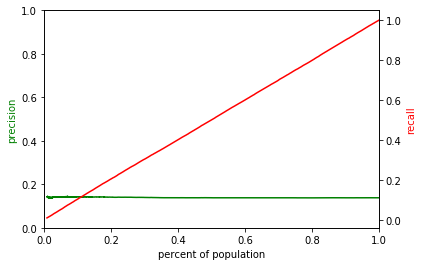

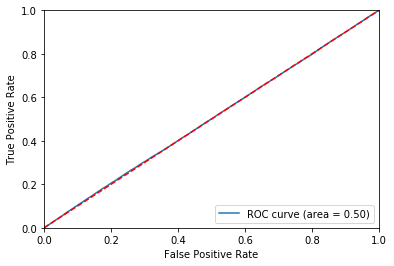

LR{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


KeyboardInterrupt: 

In [24]:
predictions, models, stats = ml.model_analyzer_over_time(clfs, grid, 'show', thresholds, train_xs, train_ys, test_xs, test_ys, feats)

In [25]:
predictions.head()

NameError: name 'predictions' is not defined

In [ ]:
stats.head()